In [1]:
import altair as alt
alt.data_transformers.disable_max_rows()

from dnsmex.dasm_zoo import validation_burrito_of_pcp_df
from dnsmex.dxsm_data import pcp_df_of_multiname
from dnsmex.dasm_viz import umap_plot_df_of_dasm_burrito, plot_umap_with_categories, plot_umap_with_categories_and_histogram_selector
from dnsmex.local import localify

In [3]:
model_name = "dasm_1m-v1jaffeCC+v1tangCC-joint"
dataset_name = "v1rodriguez"
# dataset_name = "tst"


model_name = "dasm_1m-v1jaffeCC+v1tangCC-joint"
crepe_prefix = localify(f"DASM_TRAINED_MODELS_DIR/{model_name}")

pcp_df = pcp_df_of_multiname(dataset_name)
pcp_df = pcp_df.drop_duplicates(subset=['parent_heavy']).reset_index(drop=True)

validation_burrito = validation_burrito_of_pcp_df(crepe_prefix, pcp_df, "cpu")

Loading /home/wdumm/data/v3/rodriguez-airr-seq-race-prod-NoWinCheck_igh_pcp_2024-11-12_MASKED_NI_noN_no-naive.csv.gz
Filtering out problematic pairs of sample_id and clonal families [('sample-igg-SC-18', '440')]
Loading model ThriftyHumV0.2-59
Using cached models: /home/wdumm/dnsm-netam-proj/netam/netam/_pretrained/thrifty-0.2.0.zip


/home/wdumm/dnsm-netam-proj/netam/netam/dxsm.py:323: UserWarning: Model type is unknown. This is likely an old model that does not include its type (dnsm, ddsm, or dasm, etc.) in its metadata. Be sure the model type matches the Dataset and Burrito type.
  warn(


## Build UMAP Plot
Note that this is non-deterministic, so expect a different transformation each time this notebook is run.

In [4]:
data_columns = [
    "sample_id",
    "family",
    "v_family_heavy",
    "v_gene_heavy",
    "depth",
    "distance",
    "child_is_leaf",
]
udf = umap_plot_df_of_dasm_burrito(validation_burrito, global_mask=True, original_pcp_df=pcp_df, data_columns=data_columns)

Evaluating model: 100%|██████████| 13/13 [03:20<00:00, 15.39s/it]


Computing UMAP transformation...


/home/wdumm/dnsm-netam-proj/.pixi/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/wdumm/dnsm-netam-proj/.pixi/envs/default/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [5]:
altair_plot = plot_umap_with_categories_and_histogram_selector(udf.sample(n=5000), ["v_family_heavy", "v_gene_heavy"], tooltip_columns=data_columns, selection_column="depth")
# altair_plot.save("dasm_cluster.html")
altair_plot

alt.VConcatChart(...)

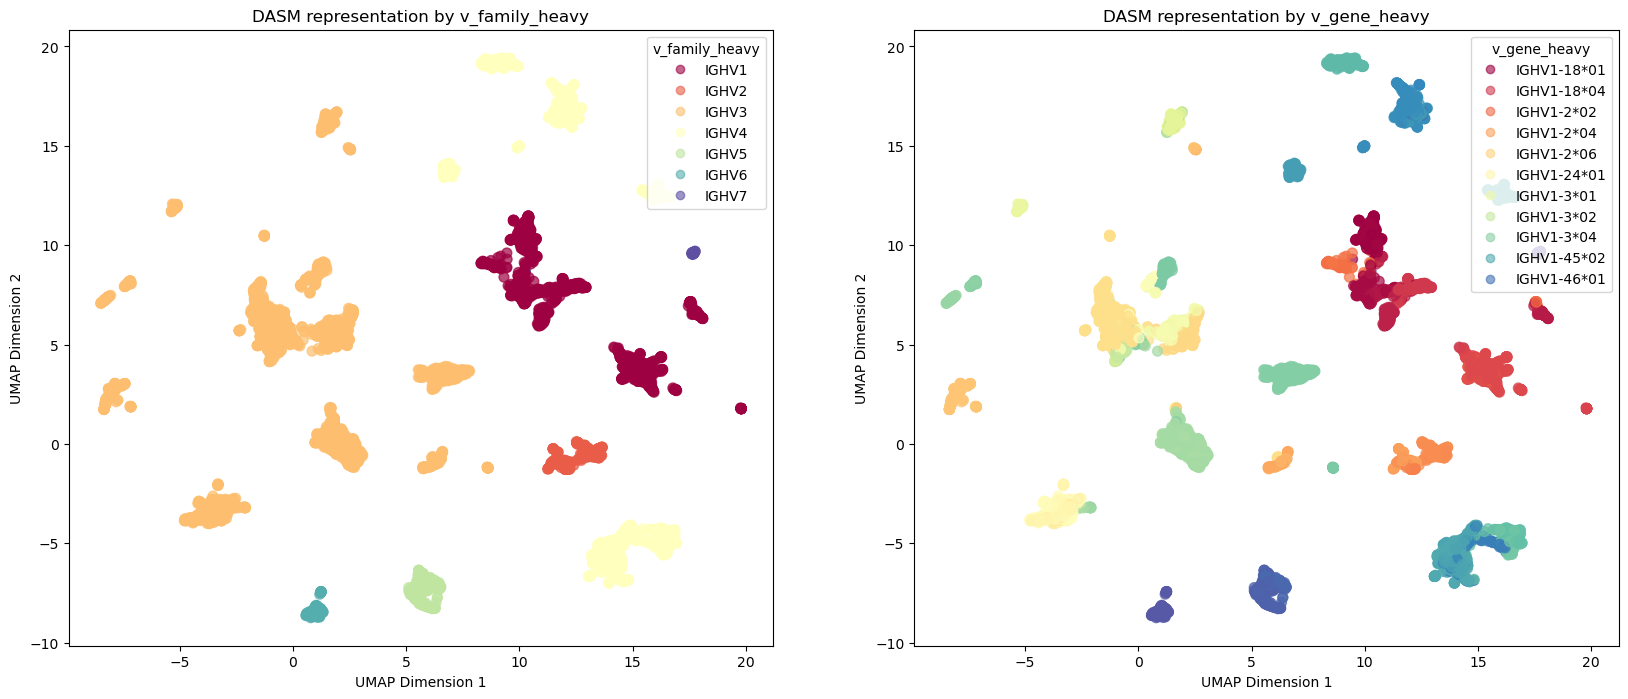

In [6]:
fig = plot_umap_with_categories(udf, ['v_family_heavy', 'v_gene_heavy'])